313/313 [==============================] - 1s 1ms/step - loss: 0.4494 - accuracy: 0.8448
Accuracy =  0.8447999954223633
Pick a number: 7


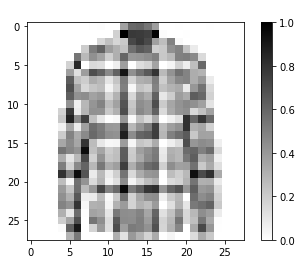

In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


#Get the dataset and split it

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()



####Inspect the dataset

# train_images[0,23,23]   looking at one pixel (60000 images, 28x28 pixels for each)
# train_labels[:10]       check 10 labels



#Crate an array for labels/class names.

class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']






####Plot visualize and inspect the data
"""plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()"""




#Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0




#Create the model
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,'relu'),keras.layers.Dense(10,'softmax')])


#Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#Train/fit and evaluate
model.fit(train_images,train_labels,epochs=1)

test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=1)

print("Accuracy = ",test_acc)

#Predict
"""predictions = model.predict(test_images)
print(np.argmax(predictions[0]))
print(test_labels[0])
"""


#Extra function not necessary
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)